### ***Trabajo hecho por: Gabriela Puerta Bello***

***VARIABLES DEL CONJUNTO DE DATOS***

---

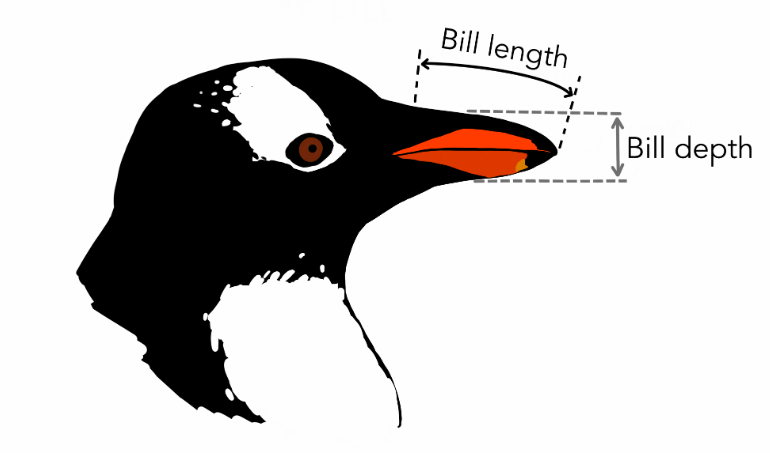

Este conjunto de datos contiene información de varias especies de pingüinos, en este trabajo clasificare las especies existentes segun sus caracteristicas las cuales son las siguientes:

**bill_length_mm:** Longitud del pico en milímetros.El pico es la parte superior del pico del pingüino. La longitud de este puede variar significativamente entre diferentes especies y sexos.

**bill_depth_mm:** Profundidad del pico en milímetros. La profundidad del pico se mide desde la base del pico hasta la parte superior. Esta medida también puede ser un indicativo de la especie y el sexo del pingüino.

**flipper_length_mm:** Longitud de las aletas en milímetros. La longitud de las aletas es una característica importante para la identificación de especies, ya que varía entre ellas.

**body_mass_g:** Masa corporal en gramos. La masa corporal puede variar ampliamente entre diferentes especies de pingüinos y puede ser un indicador de la salud y la edad del ave.

**sex:** Sexo del pingüino, clasificado en 'MALE' para machos y 'FEMALE' para hembras.



---




***Importación de librerias***

---



In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pickle
from google.colab import files
from sklearn.metrics import calinski_harabasz_score
import joblib


***Lectura del conjunto de datos***

---



In [126]:
df = pd.read_csv('https://raw.githubusercontent.com/GabrielaPuerta/AnalisisAlgoritmos/main/penguins.csv', sep = ",")
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE



***Limpieza de datos***

---



In [127]:
# Identifica si hay nulos y los tipos de datos que tienen la columna del df
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     342 non-null    float64
 1   bill_depth_mm      342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB
None


In [128]:
df = df.dropna()
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE



***Transformación númerica***

---



In [129]:
df['sex'] = df['sex'].map({'MALE': 0, 'FEMALE': 1})
df

<ipython-input-129-19c3afde17f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].map({'MALE': 0, 'FEMALE': 1})


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,0.0
1,39.5,17.4,186.0,3800.0,1.0
2,40.3,18.0,195.0,3250.0,1.0
4,36.7,19.3,193.0,3450.0,1.0
5,39.3,20.6,190.0,3650.0,0.0
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1.0
340,46.8,14.3,215.0,4850.0,1.0
341,50.4,15.7,222.0,5750.0,0.0
342,45.2,14.8,212.0,5200.0,1.0



***Selección y estandarización de caracteristicas***

---



In [130]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

X = df[features]

In [131]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-0.89772327  0.77726336 -0.12689335 -0.57223347]
 [-0.82426521  0.11703673 -0.10787184 -0.50992298]
 [-0.67734909  0.42175671 -0.07363312 -1.19533834]
 ...
 [ 1.17746691 -0.74633656  0.02908304  1.920186  ]
 [ 0.22251214 -1.20341653 -0.00895998  1.23477065]
 [ 1.08564434 -0.5431899  -0.00515568  1.4840126 ]]



***Modelo K-Means***

---



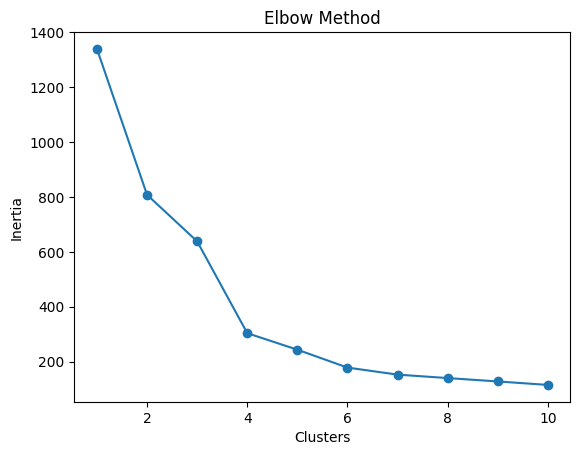

In [132]:
scc = []
for i in range(1,11):
  modelo = KMeans(n_clusters = i, random_state = 0, n_init="auto")
  modelo.fit(X_scaled)
  scc.append(modelo.inertia_)

plt.plot(range(1,11), scc, marker="o")
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

In [133]:
optimal_clusters = 3

kmeans = KMeans(n_clusters=optimal_clusters, max_iter=300, n_init=10, random_state=0)

kmeans.fit(X)

df['Cluster'] = kmeans.labels_

<ipython-input-133-6f064fc88a72>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.labels_



***Visualizaciones***

---



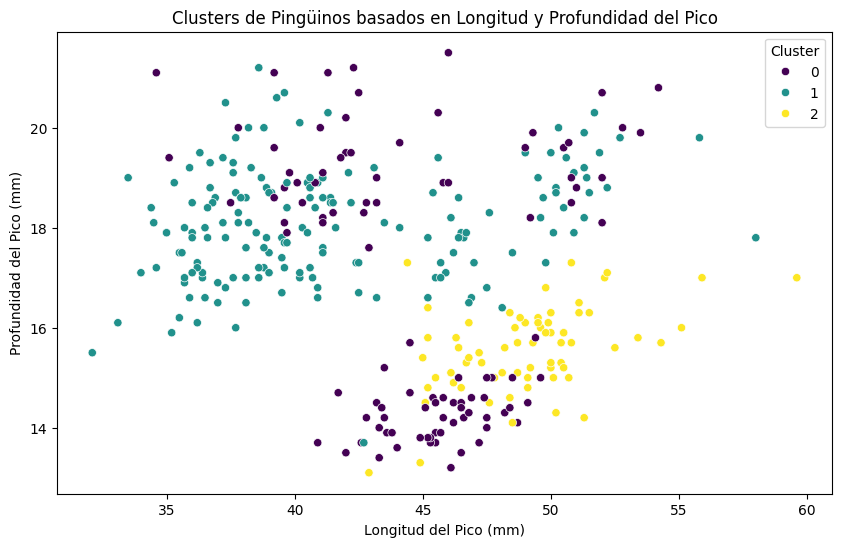

In [134]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='Cluster', palette='viridis')
plt.title('Clusters de Pingüinos basados en Longitud y Profundidad del Pico')
plt.xlabel('Longitud del Pico (mm)')
plt.ylabel('Profundidad del Pico (mm)')
plt.show()


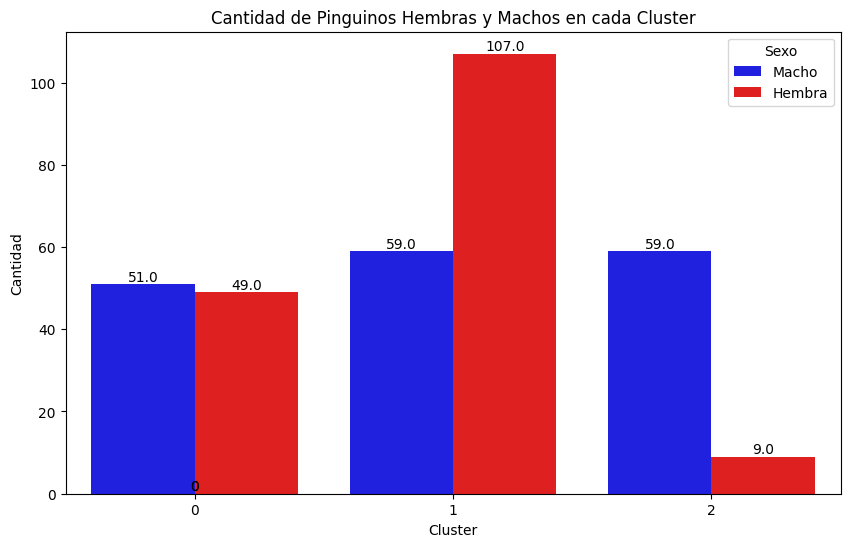

In [135]:
gender_counts = df.groupby(['Cluster', 'sex']).size().reset_index(name='count')

gender_counts['sex'] = gender_counts['sex'].replace({0: 'Macho', 1: 'Hembra'})

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=gender_counts, x='Cluster', y='count', hue='sex', palette={'Macho': 'blue', 'Hembra': 'red'})

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Cluster')
plt.ylabel('Cantidad')
plt.title('Cantidad de Pinguinos Hembras y Machos en cada Cluster')
plt.legend(title='Sexo')


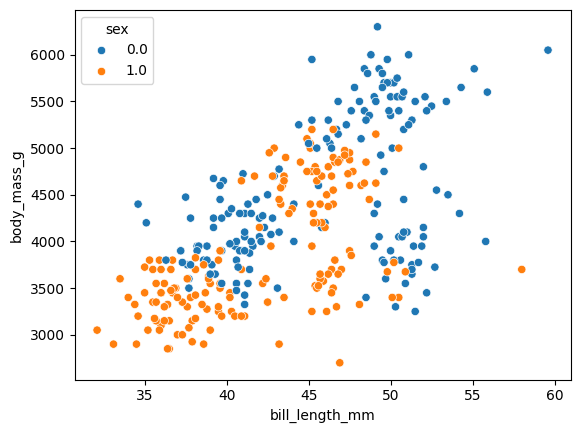

In [136]:
sns.scatterplot(data=df, x='bill_length_mm', y='body_mass_g', hue='sex')
plt.show()

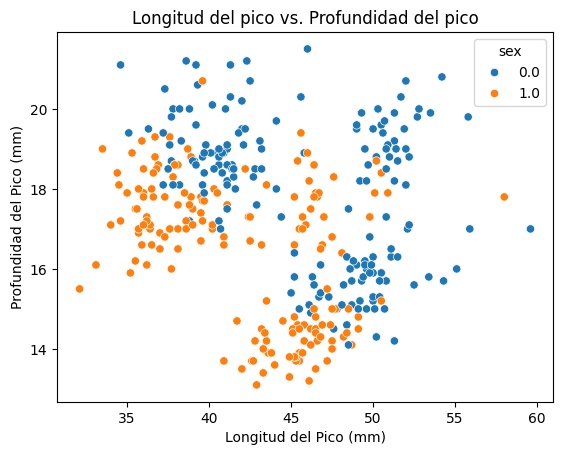

In [137]:
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='sex')
plt.title('Longitud del pico vs. Profundidad del pico')
plt.xlabel('Longitud del Pico (mm)')
plt.ylabel('Profundidad del Pico (mm)')
plt.show()

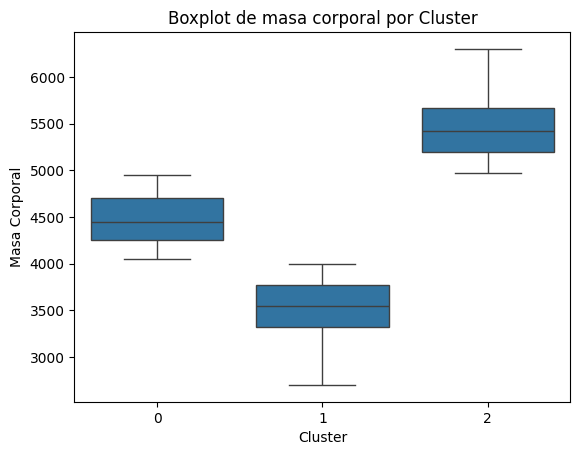

In [138]:
sns.boxplot(x='Cluster', y='body_mass_g', data=df)

plt.title('Boxplot de masa corporal por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Masa Corporal')

plt.show()


***Métricas de evaluación***

---



In [140]:
silhouette_coefficient = silhouette_score(X, kmeans.labels_)

print("Coeficiente de Silueta:", silhouette_coefficient)

Coeficiente de Silueta: 0.5715543076462783


In [141]:
#Con Datos escalados
silhouette_coefficient = silhouette_score(X_scaled, kmeans.labels_)

print("Coeficiente de Silueta:", silhouette_coefficient)

Coeficiente de Silueta: 0.25320853118983616


In [142]:
ch_score = calinski_harabasz_score(X, kmeans.labels_)

print("Índice Calinski Harabaz:", ch_score)

Índice Calinski Harabaz: 604.1009035590978


In [143]:
#Descarga del modelo entrenado
filename = 'ModeloEntrenadoPinguinsUltimo.pkl'
joblib.dump((scaler, kmeans, optimal_clusters), open(filename, 'wb'))

files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>